Name - Rutik Kothwala
Introduction to Deep Learning project 2 
 UID - U01868702

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import datetime
import warnings; warnings.simplefilter('ignore')

C:\Users\rutik\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os

Weather Dataset

In [3]:
data_weather= pd.read_csv("C:/Users/rutik/Downloads/January_2020.csv")

In [4]:
data_weather

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-01-01,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
1,2020-01-02,4.7,0.6,8.9,NaN,NaN,NaN,12.4,NaN,1013.9,NaN
2,2020-01-03,7.6,6.7,8.3,NaN,NaN,NaN,8.4,NaN,1010.2,NaN
3,2020-01-04,8.2,6.7,9.4,NaN,NaN,NaN,5.7,NaN,1003.7,NaN
4,2020-01-05,4.6,2.8,7.2,NaN,NaN,NaN,8.2,NaN,1010.1,NaN
5,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-01-07,4.7,3.3,6.7,NaN,NaN,NaN,10.4,NaN,1016.2,NaN
7,2020-01-08,2.6,-0.6,6.7,NaN,NaN,NaN,13.4,NaN,1016.6,NaN
8,2020-01-09,-0.6,-3.3,2.2,NaN,NaN,NaN,9.1,NaN,1038.8,NaN
9,2020-01-10,6.4,1.1,11.7,NaN,NaN,265.0,14.5,NaN,1034.5,NaN


In [5]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    31 non-null     object 
 1   tavg    28 non-null     float64
 2   tmin    28 non-null     float64
 3   tmax    28 non-null     float64
 4   prcp    0 non-null      float64
 5   snow    0 non-null      float64
 6   wdir    1 non-null      float64
 7   wspd    27 non-null     float64
 8   wpgt    0 non-null      float64
 9   pres    27 non-null     float64
 10  tsun    0 non-null      float64
dtypes: float64(10), object(1)
memory usage: 2.8+ KB


In [6]:
data_weather['date'] = pd.to_datetime(data_weather.date)

In [7]:
data_weather['yday'] = data_weather.date.dt.dayofyear

In [8]:
data_weather.isnull().sum()

date     0
tavg     3
tmin     3
tmax     3
prcp    31
snow    31
wdir    30
wspd     4
wpgt    31
pres     4
tsun    31
yday     0
dtype: int64

In [9]:
data_weather = data_weather.drop(['tmin','tmax','prcp','snow','wdir','wpgt','tsun'],axis=1)
data_weather

,date,tavg,wspd,pres,yday
0,2020-01-01,3.6,17.3,1008.2,1
1,2020-01-02,4.7,12.4,1013.9,2
2,2020-01-03,7.6,8.4,1010.2,3
3,2020-01-04,8.2,5.7,1003.7,4
4,2020-01-05,4.6,8.2,1010.1,5
5,2020-01-06,NaN,NaN,NaN,6
6,2020-01-07,4.7,10.4,1016.2,7
7,2020-01-08,2.6,13.4,1016.6,8
8,2020-01-09,-0.6,9.1,1038.8,9
9,2020-01-10,6.4,14.5,1034.5,10


In [10]:
data_weather['tavg'] = data_weather['tavg'].fillna(0)
data_weather

,date,tavg,wspd,pres,yday
0,2020-01-01,3.6,17.3,1008.2,1
1,2020-01-02,4.7,12.4,1013.9,2
2,2020-01-03,7.6,8.4,1010.2,3
3,2020-01-04,8.2,5.7,1003.7,4
4,2020-01-05,4.6,8.2,1010.1,5
5,2020-01-06,0.0,NaN,NaN,6
6,2020-01-07,4.7,10.4,1016.2,7
7,2020-01-08,2.6,13.4,1016.6,8
8,2020-01-09,-0.6,9.1,1038.8,9
9,2020-01-10,6.4,14.5,1034.5,10


In [11]:
# Calculate the mean of the 'wspd' column
wspd_mean = data_weather['wspd'].mean()

# Replace null values in the 'wspd' column with the mean
data_weather['wspd'].fillna(wspd_mean, inplace=True)

# Calculate the mean of the 'pres' column
pres_mean = data_weather['pres'].mean()

# Replace null values in the 'pres' column with the mean
data_weather['pres'].fillna(pres_mean, inplace=True)


In [12]:
data_weather

,date,tavg,wspd,pres,yday
0,2020-01-01,3.6,17.300000,1008.200000,1
1,2020-01-02,4.7,12.400000,1013.900000,2
2,2020-01-03,7.6,8.400000,1010.200000,3
3,2020-01-04,8.2,5.700000,1003.700000,4
4,2020-01-05,4.6,8.200000,1010.100000,5
5,2020-01-06,0.0,10.662963,1020.418519,6
6,2020-01-07,4.7,10.400000,1016.200000,7
7,2020-01-08,2.6,13.400000,1016.600000,8
8,2020-01-09,-0.6,9.100000,1038.800000,9
9,2020-01-10,6.4,14.500000,1034.500000,10


In [13]:
data_weather.isnull().sum()

date    0
tavg    0
wspd    0
pres    0
yday    0
dtype: int64

Taxi Dataset

In [14]:
data_taxi = pd.read_parquet("C:/Users/rutik/Downloads/yellow_tripdata_2020-01.parquet", engine = 'fastparquet')
data_taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,NaN
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,NaN
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,NaN
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,NaN
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2,2020-01-31 23:08:00,2020-01-31 23:34:00,NaN,12.07,NaN,None,191,35,0,52.18,2.75,0.5,0.00,0.00,0.3,55.73,NaN,NaN
6405004,2,2020-01-31 23:00:00,2020-01-31 23:44:00,NaN,23.48,NaN,None,186,117,0,54.01,2.75,0.5,0.00,6.12,0.3,63.68,NaN,NaN
6405005,2,2020-01-31 23:13:00,2020-01-31 23:38:00,NaN,12.09,NaN,None,164,131,0,38.02,2.75,0.5,0.00,6.12,0.3,47.69,NaN,NaN
6405006,2,2020-01-31 23:02:54,2020-01-31 23:27:10,NaN,11.65,NaN,None,10,16,0,28.74,2.75,0.0,0.00,0.00,0.3,31.79,NaN,NaN


In [15]:
data_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [16]:
data_taxi['yday'] = data_taxi.tpep_pickup_datetime.dt.dayofyear

In [17]:
data_taxi['trip_duration'] = (data_taxi['tpep_dropoff_datetime'] - data_taxi['tpep_pickup_datetime']).dt.seconds/60

In [18]:
data_taxi = data_taxi.drop(['airport_fee'], axis=1)

In [19]:
# Replace missing values in each categorical column with its mode

In [20]:
selected_columns = data_taxi[['congestion_surcharge', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag']]


for column in selected_columns.columns:
    mode_value = data_taxi[column].mode()[0]  # Calculate the mode (most frequent value)
    data_taxi[column].fillna(mode_value, inplace=True)

In [21]:
data_taxi.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
yday                     0
trip_duration            0
dtype: int64

In [22]:
data_taxi = data_taxi.drop(['store_and_fwd_flag'], axis=1)

In [23]:
data_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  yday                   int32         
 18  trip_duration         

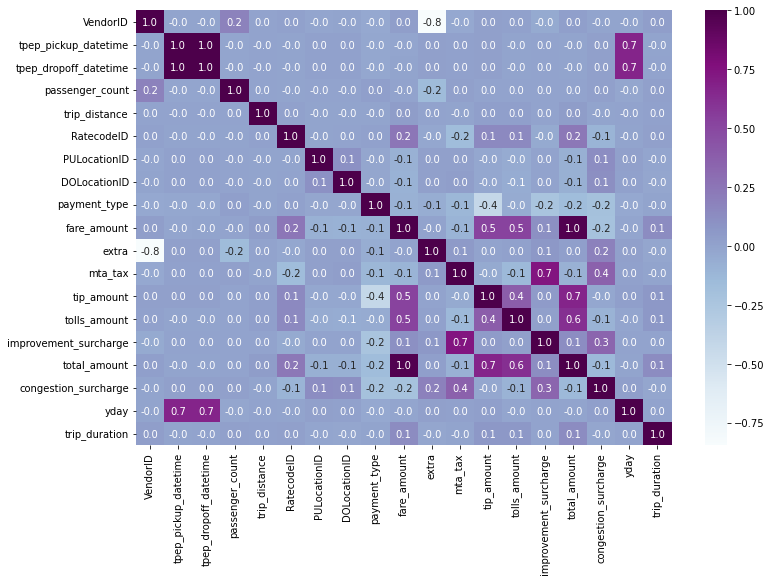

In [24]:
from _plotly_utils.colors.colorbrewer import BuPu
plt.figure(figsize = (12,8))
sns.heatmap(data_taxi.corr(), cmap="BuPu", annot =True, fmt=".1f")
plt.show()

In [25]:
tmp=data_taxi.corr()
a=tmp.unstack().sort_values().drop_duplicates()
a[((a >= 0.3) & (a!=1)) | ((a <= -0.3) & (a!=1))]

VendorID               extra                   -0.845994
payment_type           tip_amount              -0.418095
congestion_surcharge   improvement_surcharge    0.342843
mta_tax                congestion_surcharge     0.361195
tip_amount             tolls_amount             0.381791
tolls_amount           fare_amount              0.526764
tip_amount             fare_amount              0.528920
tolls_amount           total_amount             0.620859
tip_amount             total_amount             0.668995
yday                   tpep_pickup_datetime     0.672831
                       tpep_dropoff_datetime    0.672851
improvement_surcharge  mta_tax                  0.738633
fare_amount            total_amount             0.976689
tpep_pickup_datetime   tpep_dropoff_datetime    0.999994
dtype: float64

In [26]:
data_taxi['yday'] = data_taxi.tpep_pickup_datetime.dt.dayofyear

In [27]:
data_taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,yday,trip_duration
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,238,239,1,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,1,4.800000
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,239,238,1,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,1,7.416667
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,238,238,1,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,1,6.183333
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,238,151,1,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,1,4.850000
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,1,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2,2020-01-31 23:08:00,2020-01-31 23:34:00,1.0,12.07,1.0,191,35,0,52.18,2.75,0.5,0.00,0.00,0.3,55.73,2.5,31,26.000000
6405004,2,2020-01-31 23:00:00,2020-01-31 23:44:00,1.0,23.48,1.0,186,117,0,54.01,2.75,0.5,0.00,6.12,0.3,63.68,2.5,31,44.000000
6405005,2,2020-01-31 23:13:00,2020-01-31 23:38:00,1.0,12.09,1.0,164,131,0,38.02,2.75,0.5,0.00,6.12,0.3,47.69,2.5,31,25.000000
6405006,2,2020-01-31 23:02:54,2020-01-31 23:27:10,1.0,11.65,1.0,10,16,0,28.74,2.75,0.0,0.00,0.00,0.3,31.79,2.5,31,24.266667


Merging Of Dataset

In [28]:
merge_dataset = pd.merge(data_taxi, data_weather, on='yday')

In [29]:
merge_dataset

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,yday,trip_duration,date,tavg,wspd,pres
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,238,239,1,6.00,...,0.00,0.3,11.27,2.5,1,4.800000,2020-01-01,3.6,17.3,1008.2
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,239,238,1,7.00,...,0.00,0.3,12.30,2.5,1,7.416667,2020-01-01,3.6,17.3,1008.2
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,238,238,1,6.00,...,0.00,0.3,10.80,2.5,1,6.183333,2020-01-01,3.6,17.3,1008.2
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,238,151,1,5.50,...,0.00,0.3,8.16,0.0,1,4.850000,2020-01-01,3.6,17.3,1008.2
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,193,193,2,3.50,...,0.00,0.3,4.80,0.0,1,2.300000,2020-01-01,3.6,17.3,1008.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404814,2,2020-01-31 23:08:00,2020-01-31 23:34:00,1.0,12.07,1.0,191,35,0,52.18,...,0.00,0.3,55.73,2.5,31,26.000000,2020-01-31,4.3,7.5,1026.0
6404815,2,2020-01-31 23:00:00,2020-01-31 23:44:00,1.0,23.48,1.0,186,117,0,54.01,...,6.12,0.3,63.68,2.5,31,44.000000,2020-01-31,4.3,7.5,1026.0
6404816,2,2020-01-31 23:13:00,2020-01-31 23:38:00,1.0,12.09,1.0,164,131,0,38.02,...,6.12,0.3,47.69,2.5,31,25.000000,2020-01-31,4.3,7.5,1026.0
6404817,2,2020-01-31 23:02:54,2020-01-31 23:27:10,1.0,11.65,1.0,10,16,0,28.74,...,0.00,0.3,31.79,2.5,31,24.266667,2020-01-31,4.3,7.5,1026.0


In [30]:
merge_dataset=merge_dataset.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','date'],axis=1)

In [31]:
merge_dataset.isnull().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
yday                     0
trip_duration            0
tavg                     0
wspd                     0
pres                     0
dtype: int64

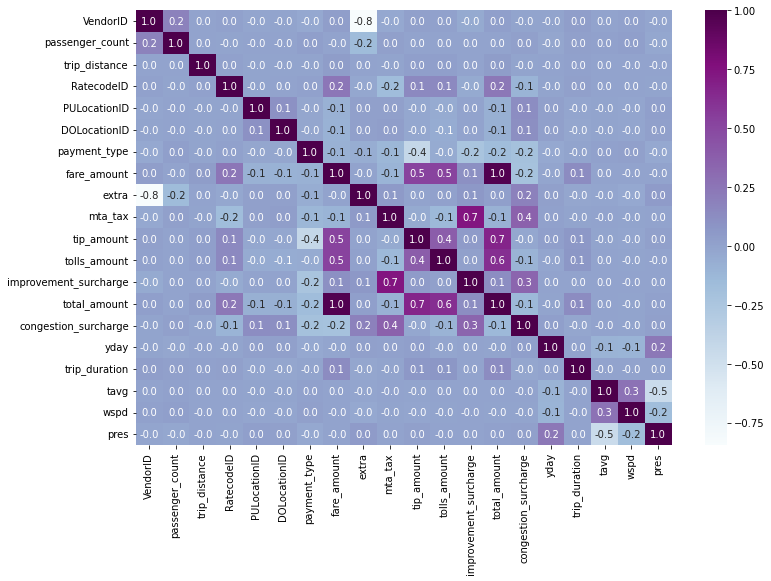

In [35]:
from _plotly_utils.colors.colorbrewer import BuPu
plt.figure(figsize = (12,8))
sns.heatmap(merge_dataset.corr(), cmap="BuPu", annot =True, fmt=".1f")
plt.show()

In [38]:
tmp=merge_dataset.corr()
a=tmp.unstack().sort_values().drop_duplicates()
a[((a >= 0.3) & (a!=1)) | ((a <= -0.3) & (a!=1))]

extra                  VendorID                -0.845994
tavg                   pres                    -0.458893
payment_type           tip_amount              -0.418098
congestion_surcharge   improvement_surcharge    0.342833
                       mta_tax                  0.361190
tolls_amount           tip_amount               0.381802
                       fare_amount              0.526778
fare_amount            tip_amount               0.528905
total_amount           tolls_amount             0.620875
                       tip_amount               0.668987
improvement_surcharge  mta_tax                  0.738637
total_amount           fare_amount              0.976688
dtype: float64

In [39]:
from math import radians, cos, sin, asin, sqrt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
import random
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [40]:
X = merge_dataset.drop ("trip_duration", axis=1)
Y = merge_dataset["trip_duration"]

In [41]:
X = np.array(X)
Y = np.array(Y)

In [42]:
scaled_df = MinMaxScaler().fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
num_features = scaled_df.shape[1]

In [43]:
from sklearn.model_selection import train_test_split
# Calculate the number of samples for the validation set
validation_ratio = 0.2
num_samples = len(X)
num_validation_samples = int(validation_ratio * num_samples)

# Split the data into training and validation sets
X_train = X[:-num_validation_samples]
Y_train = Y[:-num_validation_samples]
X_val = X[-num_validation_samples:]
Y_val = Y[-num_validation_samples:]

Modelling

1) MLP (Multi-Layer Perceptron)

In [46]:
num_features=X.shape[1]

In [47]:
model1 = Sequential()
model1.add(Dense(128, input_dim=num_features, activation='relu'))
model1.add(Dense(64, activation ='relu'))
model1.add(Dense(32, activation ='relu'))
model1.add(Dense(1, activation = 'relu'))
model1.compile(optimizer='adam',loss= 'mean_squared_error', metrics=['mse', 'mae', 'mape'])

In [48]:
model1.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
    loss='mae', 
    metrics=['mse', 'mae', 'mape','accuracy']
    )

In [49]:
# using batch size 512 as 32 batch Size is taking lots of time to run

In [50]:
history = model1.fit(
    X_train,
    Y_train,
    batch_size = 512,
    epochs=100,
    validation_data=(X_val, Y_val), 
    shuffle=True,
    verbose=True,
    #callbacks=[tensorboard_callback]
)

Epoch 1/100
10008/10008 [==============================] - 29s 3ms/step - loss: 15.9732 - mse: 4247.7534 - mae: 15.9732 - mape: 19053.1484 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.5049 - val_mae: 15.8384 - val_mape: 99.9339 - val_accuracy: 6.6591e-04
Epoch 2/100
10008/10008 [==============================] - 30s 3ms/step - loss: 15.9659 - mse: 4247.0630 - mae: 15.9659 - mape: 99.9330 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.5049 - val_mae: 15.8384 - val_mape: 99.9339 - val_accuracy: 6.6591e-04
Epoch 3/100
10008/10008 [==============================] - 32s 3ms/step - loss: 15.9659 - mse: 4247.0586 - mae: 15.9659 - mape: 99.9329 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.5049 - val_mae: 15.8384 - val_mape: 99.9339 - val_accuracy: 6.6591e-04
Epoch 4/100
10008/10008 [==============================] - 30s 3ms/step - loss: 15.9658 - mse: 4247.0688 - mae: 15.9658 - mape: 99.9329 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.5049

Epoch 32/100
10008/10008 [==============================] - 49s 5ms/step - loss: 15.9658 - mse: 4247.0610 - mae: 15.9658 - mape: 99.9329 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.5049 - val_mae: 15.8384 - val_mape: 99.9339 - val_accuracy: 6.6591e-04
Epoch 33/100
10008/10008 [==============================] - 55s 6ms/step - loss: 15.9658 - mse: 4247.0732 - mae: 15.9658 - mape: 99.9330 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.5049 - val_mae: 15.8384 - val_mape: 99.9339 - val_accuracy: 6.6591e-04
Epoch 34/100
10008/10008 [==============================] - 53s 5ms/step - loss: 15.9659 - mse: 4247.0591 - mae: 15.9659 - mape: 99.9329 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.5049 - val_mae: 15.8384 - val_mape: 99.9339 - val_accuracy: 6.6591e-04
Epoch 35/100
10008/10008 [==============================] - 53s 5ms/step - loss: 15.9659 - mse: 4247.0669 - mae: 15.9659 - mape: 99.9329 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.504

Epoch 63/100
10008/10008 [==============================] - 238s 24ms/step - loss: 15.9659 - mse: 4247.0586 - mae: 15.9659 - mape: 99.9329 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.5049 - val_mae: 15.8384 - val_mape: 99.9339 - val_accuracy: 6.6591e-04
Epoch 64/100
10008/10008 [==============================] - 63s 6ms/step - loss: 15.9659 - mse: 4247.0645 - mae: 15.9659 - mape: 99.9329 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.5049 - val_mae: 15.8384 - val_mape: 99.9339 - val_accuracy: 6.6591e-04
Epoch 65/100
10008/10008 [==============================] - 63s 6ms/step - loss: 15.9659 - mse: 4247.0664 - mae: 15.9659 - mape: 99.9330 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.5049 - val_mae: 15.8384 - val_mape: 99.9339 - val_accuracy: 6.6591e-04
Epoch 66/100
10008/10008 [==============================] - 63s 6ms/step - loss: 15.9658 - mse: 4247.0713 - mae: 15.9658 - mape: 99.9329 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.5

Epoch 94/100
10008/10008 [==============================] - 65s 6ms/step - loss: 15.9659 - mse: 4247.0767 - mae: 15.9659 - mape: 99.9329 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.5049 - val_mae: 15.8384 - val_mape: 99.9339 - val_accuracy: 6.6591e-04
Epoch 95/100
10008/10008 [==============================] - 65s 7ms/step - loss: 15.9659 - mse: 4247.0635 - mae: 15.9659 - mape: 99.9329 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.5049 - val_mae: 15.8384 - val_mape: 99.9339 - val_accuracy: 6.6591e-04
Epoch 96/100
10008/10008 [==============================] - 66s 7ms/step - loss: 15.9658 - mse: 4247.0688 - mae: 15.9658 - mape: 99.9329 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.5049 - val_mae: 15.8384 - val_mape: 99.9339 - val_accuracy: 6.6591e-04
Epoch 97/100
10008/10008 [==============================] - 66s 7ms/step - loss: 15.9658 - mse: 4247.0688 - mae: 15.9658 - mape: 99.9329 - accuracy: 6.9206e-04 - val_loss: 15.8384 - val_mse: 4064.504

In [51]:
model_df = pd.DataFrame(history.history)
model_df

,loss,mse,mae,mape,accuracy,val_loss,val_mse,val_mae,val_mape,val_accuracy
0,15.973219,4247.753418,15.973219,19053.148438,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
1,15.965851,4247.062988,15.965851,99.932961,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
2,15.965922,4247.058594,15.965922,99.932938,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
3,15.965843,4247.068848,15.965843,99.932938,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
4,15.965846,4247.058105,15.965846,99.932968,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
...,...,...,...,...,...,...,...,...,...,...
95,15.965849,4247.068848,15.965849,99.932892,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
96,15.965802,4247.068848,15.965802,99.932892,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
97,15.965871,4247.079102,15.965871,99.932915,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
98,15.965857,4247.065918,15.965857,99.932930,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666


In [52]:
model_df


,loss,mse,mae,mape,accuracy,val_loss,val_mse,val_mae,val_mape,val_accuracy
0,15.973219,4247.753418,15.973219,19053.148438,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
1,15.965851,4247.062988,15.965851,99.932961,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
2,15.965922,4247.058594,15.965922,99.932938,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
3,15.965843,4247.068848,15.965843,99.932938,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
4,15.965846,4247.058105,15.965846,99.932968,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
...,...,...,...,...,...,...,...,...,...,...
95,15.965849,4247.068848,15.965849,99.932892,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
96,15.965802,4247.068848,15.965802,99.932892,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
97,15.965871,4247.079102,15.965871,99.932915,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666
98,15.965857,4247.065918,15.965857,99.932930,0.000692,15.838361,4064.504883,15.838361,99.933922,0.000666


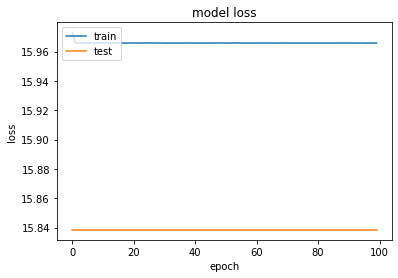

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


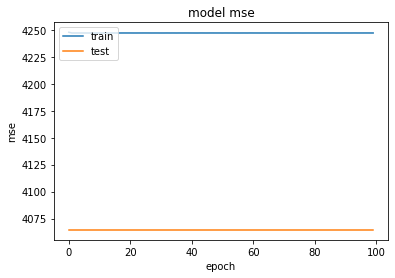

In [54]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

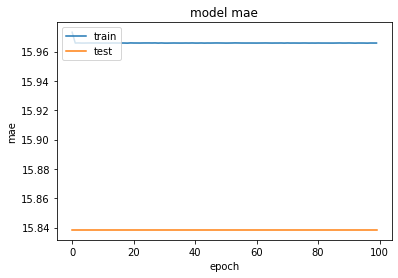

In [55]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

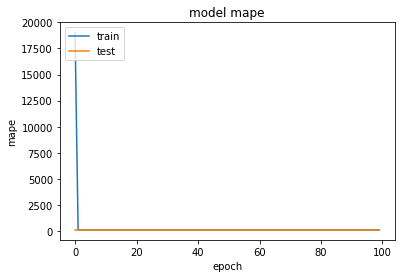

In [56]:
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('model mape')
plt.ylabel('mape')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

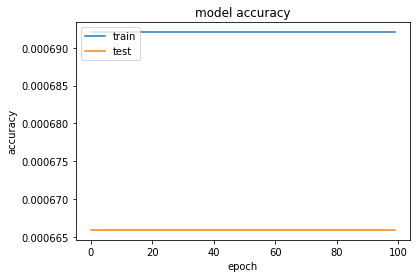

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 Linear Regression (TF/Keras Sequential model w/ no hidden layers)

In [44]:
# Define a simple Linear Regression model
model1 = keras.Sequential([
    keras.layers.Input(shape=(num_features,)),  # Input layer with the appropriate input shape
    keras.layers.Dense(1)  # Output layer with 1 unit and no activation function for linear regression
])

# Compile the model
model1.compile(optimizer='adam',  # Optimizer
              loss='mean_squared_error',  # Mean squared error loss for regression
              metrics=['mean_squared_error'])  # Evaluation metric

# Summary of the model architecture
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [45]:
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mae',
    metrics=['mse', 'mae', 'mape', 'accuracy']
)

history = model1.fit(
    X_train,
    Y_train,
    batch_size = 510,
    epochs=100,
    validation_data=(X_val, Y_val),
    shuffle=True, 
    verbose=True,

)

Epoch 1/100
10047/10047 [==============================] - 26s 2ms/step - loss: 6.1857 - mse: 4123.8818 - mae: 6.1857 - mape: 22863290.0000 - accuracy: 2.1390e-04 - val_loss: 5.6146 - val_mse: 295653.9062 - val_mae: 5.6146 - val_mape: 25435162.0000 - val_accuracy: 1.8268e-04
Epoch 2/100
10047/10047 [==============================] - 23s 2ms/step - loss: 5.4806 - mse: 4049.4841 - mae: 5.4806 - mape: 29803256.0000 - accuracy: 2.1429e-04 - val_loss: 5.5942 - val_mse: 293906.1250 - val_mae: 5.5942 - val_mape: 28611972.0000 - val_accuracy: 1.9204e-04
Epoch 3/100
10047/10047 [==============================] - 23s 2ms/step - loss: 5.4528 - mse: 4067.8184 - mae: 5.4528 - mape: 32693874.0000 - accuracy: 2.1741e-04 - val_loss: 6.3288 - val_mse: 288733.9375 - val_mae: 6.3288 - val_mape: 31668568.0000 - val_accuracy: 1.6394e-04
Epoch 4/100
10047/10047 [==============================] - 23s 2ms/step - loss: 5.4488 - mse: 4079.2339 - mae: 5.4488 - mape: 34312464.0000 - accuracy: 2.1624e-04 - val_los

Epoch 31/100
10047/10047 [==============================] - 24s 2ms/step - loss: 5.4059 - mse: 4093.3188 - mae: 5.4059 - mape: 36401476.0000 - accuracy: 2.1312e-04 - val_loss: 5.8369 - val_mse: 290025.3750 - val_mae: 5.8369 - val_mape: 32481360.0000 - val_accuracy: 1.9751e-04
Epoch 32/100
10047/10047 [==============================] - 24s 2ms/step - loss: 5.4003 - mse: 4092.6472 - mae: 5.4003 - mape: 36323552.0000 - accuracy: 2.1312e-04 - val_loss: 5.9652 - val_mse: 294094.3438 - val_mae: 5.9652 - val_mape: 32473082.0000 - val_accuracy: 2.0922e-04
Epoch 33/100
10047/10047 [==============================] - 23s 2ms/step - loss: 5.3985 - mse: 4092.7234 - mae: 5.3985 - mape: 36357556.0000 - accuracy: 2.1234e-04 - val_loss: 5.5132 - val_mse: 289191.3750 - val_mae: 5.5132 - val_mape: 32849726.0000 - val_accuracy: 1.7487e-04
Epoch 34/100
10047/10047 [==============================] - 22s 2ms/step - loss: 5.4065 - mse: 4091.7073 - mae: 5.4065 - mape: 36286000.0000 - accuracy: 2.1097e-04 - val

Epoch 61/100
10047/10047 [==============================] - 22s 2ms/step - loss: 5.3956 - mse: 4084.7649 - mae: 5.3956 - mape: 35687472.0000 - accuracy: 2.1351e-04 - val_loss: 5.5528 - val_mse: 296405.6250 - val_mae: 5.5528 - val_mape: 32305698.0000 - val_accuracy: 1.9126e-04
Epoch 62/100
10047/10047 [==============================] - 21s 2ms/step - loss: 5.3860 - mse: 4084.6670 - mae: 5.3860 - mape: 35693820.0000 - accuracy: 2.1468e-04 - val_loss: 5.4611 - val_mse: 304998.5625 - val_mae: 5.4611 - val_mape: 32580392.0000 - val_accuracy: 1.6628e-04
Epoch 63/100
10047/10047 [==============================] - 22s 2ms/step - loss: 5.3817 - mse: 4084.8423 - mae: 5.3817 - mape: 35698012.0000 - accuracy: 2.1351e-04 - val_loss: 5.5451 - val_mse: 294194.8750 - val_mae: 5.5451 - val_mape: 32779266.0000 - val_accuracy: 1.6472e-04
Epoch 64/100
10047/10047 [==============================] - 22s 2ms/step - loss: 5.3803 - mse: 4084.8391 - mae: 5.3803 - mape: 35675816.0000 - accuracy: 2.1410e-04 - val

Epoch 91/100
10047/10047 [==============================] - 22s 2ms/step - loss: 5.3719 - mse: 4079.9497 - mae: 5.3719 - mape: 35253772.0000 - accuracy: 2.1312e-04 - val_loss: 5.5451 - val_mse: 303684.8750 - val_mae: 5.5451 - val_mape: 31925282.0000 - val_accuracy: 1.9282e-04
Epoch 92/100
10047/10047 [==============================] - 21s 2ms/step - loss: 5.3796 - mse: 4078.9963 - mae: 5.3796 - mape: 35170700.0000 - accuracy: 2.1410e-04 - val_loss: 5.4539 - val_mse: 306600.7500 - val_mae: 5.4539 - val_mape: 32295836.0000 - val_accuracy: 1.6550e-04
Epoch 93/100
10047/10047 [==============================] - 21s 2ms/step - loss: 5.3746 - mse: 4079.2034 - mae: 5.3746 - mape: 35191824.0000 - accuracy: 2.1136e-04 - val_loss: 5.5654 - val_mse: 305789.9062 - val_mae: 5.5654 - val_mape: 31802502.0000 - val_accuracy: 1.9126e-04
Epoch 94/100
10047/10047 [==============================] - 21s 2ms/step - loss: 5.3689 - mse: 4079.5164 - mae: 5.3689 - mape: 35174728.0000 - accuracy: 2.1410e-04 - val

In [46]:
model_ddf = pd.DataFrame(history.history)
model_ddfmodel_ddf = pd.DataFrame(history.history)

In [47]:
model_ddf

,loss,mse,mae,mape,accuracy,val_loss,val_mse,val_mae,val_mape,val_accuracy
0,6.185748,4123.881836,6.185748,22863290.0,0.000214,5.614615,295653.90625,5.614615,25435162.0,0.000183
1,5.480551,4049.484131,5.480551,29803256.0,0.000214,5.594227,293906.12500,5.594227,28611972.0,0.000192
2,5.452837,4067.818359,5.452837,32693874.0,0.000217,6.328766,288733.93750,6.328766,31668568.0,0.000164
3,5.448792,4079.233887,5.448792,34312464.0,0.000216,5.637256,284622.68750,5.637256,31584418.0,0.000194
4,5.438944,4087.431152,5.438944,35388840.0,0.000216,5.828262,292071.28125,5.828262,32016148.0,0.000203
...,...,...,...,...,...,...,...,...,...,...
95,5.377630,4078.217773,5.377630,35092548.0,0.000218,5.568742,315761.09375,5.568742,31891030.0,0.000197
96,5.368735,4079.003662,5.368735,35154548.0,0.000216,5.977063,318708.40625,5.977063,32861648.0,0.000165
97,5.377240,4078.094238,5.377240,35062544.0,0.000211,5.499911,308677.12500,5.499911,32330946.0,0.000165
98,5.372238,4078.305420,5.372238,35079700.0,0.000212,5.446870,313563.21875,5.446870,32214940.0,0.000169


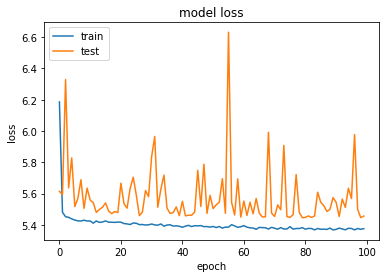

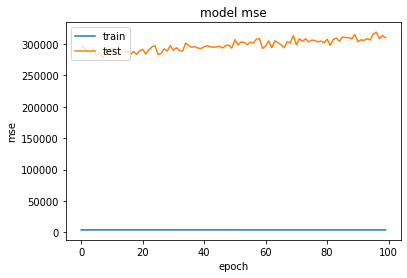

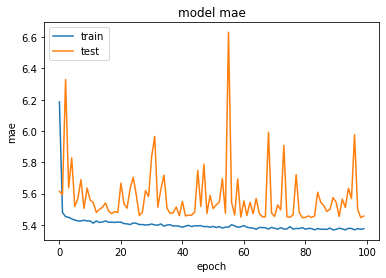

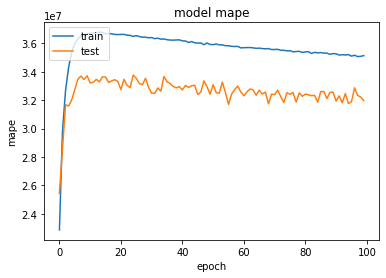

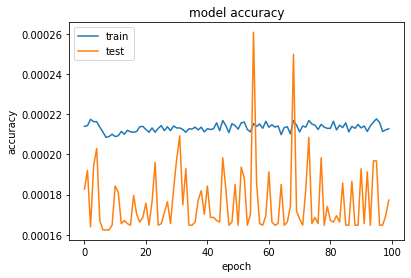

In [48]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('model mape')
plt.ylabel('mape')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

DNN model with two layers:

In [63]:
input_a = tf.keras.layers.Input(shape = (X.shape[1],), name = 'InputLayer')
hidden1 = tf.keras.layers.Dense(100, activation = 'relu', name='HiddenLayer1')(input_a)
hidden2 = tf.keras.layers.Dense(50, activation = 'relu', name='HiddenLayer2')(hidden1)
output = tf.keras.layers.Dense(1, name = 'output')(hidden2)

In [64]:
model = tf.keras.Model(inputs = [input_a], outputs = [output])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 19)]              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               2000      
                                                                 
 HiddenLayer2 (Dense)        (None, 50)                5050      
                                                                 
 output (Dense)              (None, 1)                 51        
                                                                 
Total params: 7,101
Trainable params: 7,101
Non-trainable params: 0
_________________________________________________________________


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mae',
)

history = model.fit(
    X_train,
    Y_train,
    batch_size = 512,
    epochs=100,
    validation_data=(X_val, Y_val),
    shuffle=True, 
    verbose=True,

)

In [65]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mae',
)

history = model.fit(
    X_train,
    Y_train,
    batch_size = 512,
    epochs=100,
    validation_data=(X_val, Y_val),
    shuffle=True, 
    verbose=True,

)

Epoch 1/100
10008/10008 [==============================] - 54s 5ms/step - loss: 9.6748 - val_loss: 10.4397
Epoch 2/100
10008/10008 [==============================] - 51s 5ms/step - loss: 9.7611 - val_loss: 9.5064
Epoch 3/100
10008/10008 [==============================] - 52s 5ms/step - loss: 9.7199 - val_loss: 9.5073
Epoch 4/100
10008/10008 [==============================] - 51s 5ms/step - loss: 9.7198 - val_loss: 9.5064
Epoch 5/100
10008/10008 [==============================] - 51s 5ms/step - loss: 9.7198 - val_loss: 9.5130
Epoch 6/100
10008/10008 [==============================] - 51s 5ms/step - loss: 9.7197 - val_loss: 9.5185
Epoch 7/100
10008/10008 [==============================] - 52s 5ms/step - loss: 9.7198 - val_loss: 9.5063
Epoch 8/100
10008/10008 [==============================] - 53s 5ms/step - loss: 9.7198 - val_loss: 9.5063
Epoch 9/100
10008/10008 [==============================] - 54s 5ms/step - loss: 9.7198 - val_loss: 9.5076
Epoch 10/100
10008/10008 [===================

In [66]:
model_ddf = pd.DataFrame(history.history)
model_ddf

,loss,val_loss
0,9.674767,10.439674
1,9.761090,9.506377
2,9.719856,9.507291
3,9.719791,9.506389
4,9.719817,9.513000
...,...,...
95,9.719887,9.507234
96,9.719871,9.508676
97,9.719780,9.507324
98,9.719938,9.506272


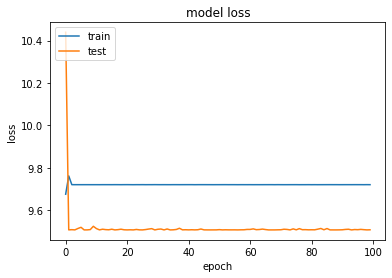

In [67]:
# summarize history for loss using learning curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 Comparing Above 3 model it can be said that loss is minimum for  Linear Regression (TF/Keras Sequential model w/ no hidden layers) and it is the best model for our data set

In [68]:
# Taking best model  for prediction

In [49]:
# Make predictions
predictions = model1.predict(X_val)


40031/40031 [==============================] - 45s 1ms/step


In [50]:
predictions

array([[39.87248 ],
       [11.010036],
       [19.07442 ],
       ...,
       [35.077335],
       [10.513302],
       [25.042164]], dtype=float32)

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
# Calculate the loss (MSE and MAE)
mse_loss = mean_squared_error(Y_val, predictions)
mae_loss = mean_absolute_error(Y_val, predictions)

# Review the loss
print(f'Mean Squared Error (MSE): {mse_loss}')
print(f'Mean Absolute Error (MAE): {mae_loss}')

Mean Squared Error (MSE): 310015.80298275984
Mean Absolute Error (MAE): 5.457001478920432


Conclusion : To Predict NYC Yellow Taxi trip duration.
             Three Deep Learning Model 1) MLP (Multi-Layer Perceptron)
2) Linear Regression (TF/Keras Sequential model w/ no hidden layers)
3) DNN (Deep Neural Network with at least 2 hidden layers) were performed among them best results are obtained from

2) Linear Regression (TF/Keras Sequential model w/ no hidden layers) 
        